#### 1. Import Libraries

In [99]:
%pip install windrose --quiet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from windrose import WindroseAxes
from sklearn.preprocessing import MinMaxScaler



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


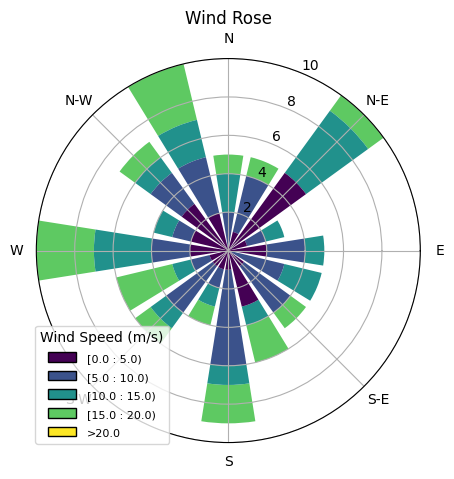

In [7]:
np.random.seed(42)
wind_directions = np.random.randint(0, 360, 100)  # Directions in degrees
wind_speeds = np.random.randint(1, 20, 100)       # Speeds in m/s

# Create wind rose plot
fig = plt.figure()
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(wind_directions, wind_speeds, bins=np.arange(0, 21, 5))

# Customize labels
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose")
plt.show()

#### 2. Load Datasets


In [59]:
weather = pd.read_csv('weather_data.csv')
weather['datetime'] = pd.to_datetime(weather['datetime'])
weather['wind_direction'] = pd.to_numeric(weather['wind_direction'], errors='coerce')
weather.sort_values(by='datetime', inplace=True)
# weather.set_index('datetime', inplace=True)
weather

,datetime,temperature,humidity,precipitation,wind_direction,wind speed,weather observation
25269,2019-01-01 00:00:00,26.8,67.0,NaN,350.0,11.0,NaN
25270,2019-01-01 01:00:00,26.8,62.0,NaN,360.0,15.0,NaN
25271,2019-01-01 02:00:00,26.8,62.0,NaN,10.0,13.0,NaN
25272,2019-01-01 03:00:00,26.8,67.0,NaN,20.0,11.0,NaN
25273,2019-01-01 04:00:00,26.8,71.0,NaN,40.0,11.0,NaN
...,...,...,...,...,...,...,...
7756,2024-11-20 19:00:00,24.0,61.0,NaN,90.0,7.0,NaN
7757,2024-11-20 20:00:00,24.0,65.0,NaN,NaN,4.0,NaN
7758,2024-11-20 21:00:00,23.0,69.0,NaN,60.0,9.0,NaN
7759,2024-11-20 22:00:00,22.0,73.0,NaN,70.0,9.0,NaN


In [119]:
weather['wind speed'].max()

54.0

### 3. Data Analysis

Data Distribution

Text(0.5, 1.0, 'Distribution of Daily Temperature')

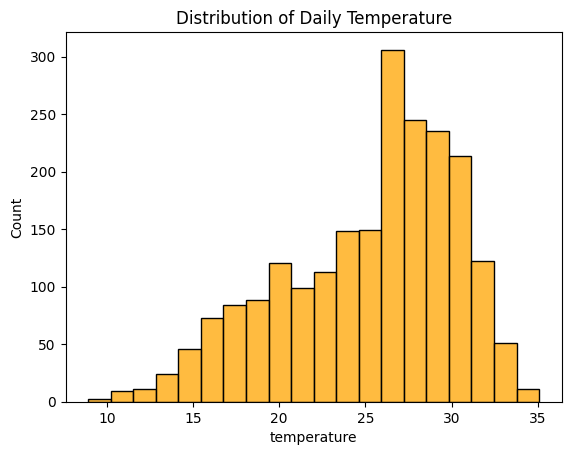

In [10]:
temp = weather.loc[:, ['datetime', 'temperature']]
temp['date'] = temp['datetime'].dt.date
temp = temp.groupby('date').temperature.mean().reset_index() 

sns.histplot(temp['temperature'], bins=20, color='orange')
plt.title('Distribution of Daily Temperature')


Text(0.5, 1.0, 'Distribution of Daily Humidity')

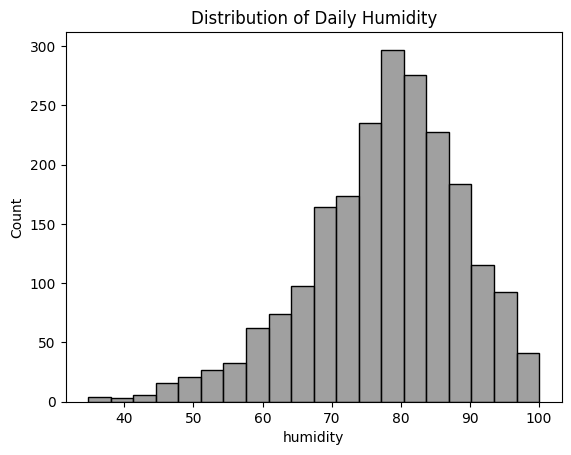

In [11]:
humid = weather.loc[:, ['datetime', 'humidity']]
humid['date'] = humid['datetime'].dt.date
humid = humid.groupby('date').humidity.mean().reset_index()

sns.histplot(humid['humidity'], bins=20, color='grey')
plt.title('Distribution of Daily Humidity')


In [14]:
weather['wind_direction'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51620 entries, 0 to 51619
Series name: wind_direction
Non-Null Count  Dtype 
--------------  ----- 
51620 non-null  object
dtypes: object(1)
memory usage: 403.4+ KB


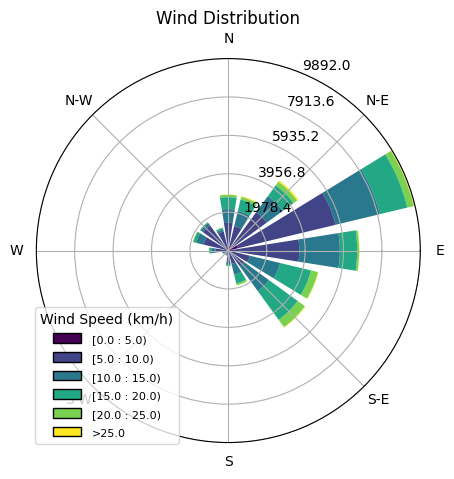

In [91]:
df = weather[~weather['wind_direction'].isna()]

# Create wind rose plot
fig = plt.figure()
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['wind_direction'], df['wind speed'], bins=np.arange(0, 30, 5))

# Customize labels
ax.set_legend(title="Wind Speed (km/h)")
plt.title("Wind Distribution")
plt.show()

Temporal Patterns

Text(0.5, 1.0, 'Hourly Temperature in first week of 2021')

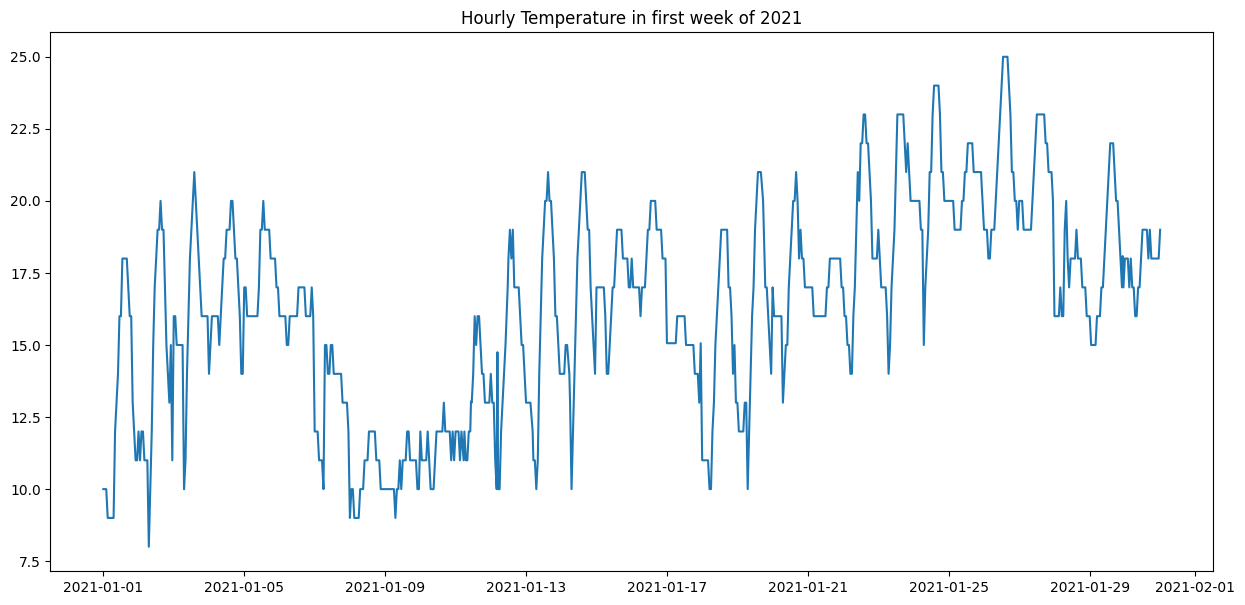

In [93]:
# Temperature hourly pattern
temp = weather[weather['datetime'].between('2021-01-01', '2021-01-31')][['datetime', 'temperature']]
temp.set_index('datetime', inplace=True)
#plot hourly temperature in 2021
plt.figure(figsize=(15, 7))
plt.plot(temp['temperature'])
plt.title("Hourly Temperature in first week of 2021")


Text(0.5, 1.0, 'Daily Temperature in 2021')

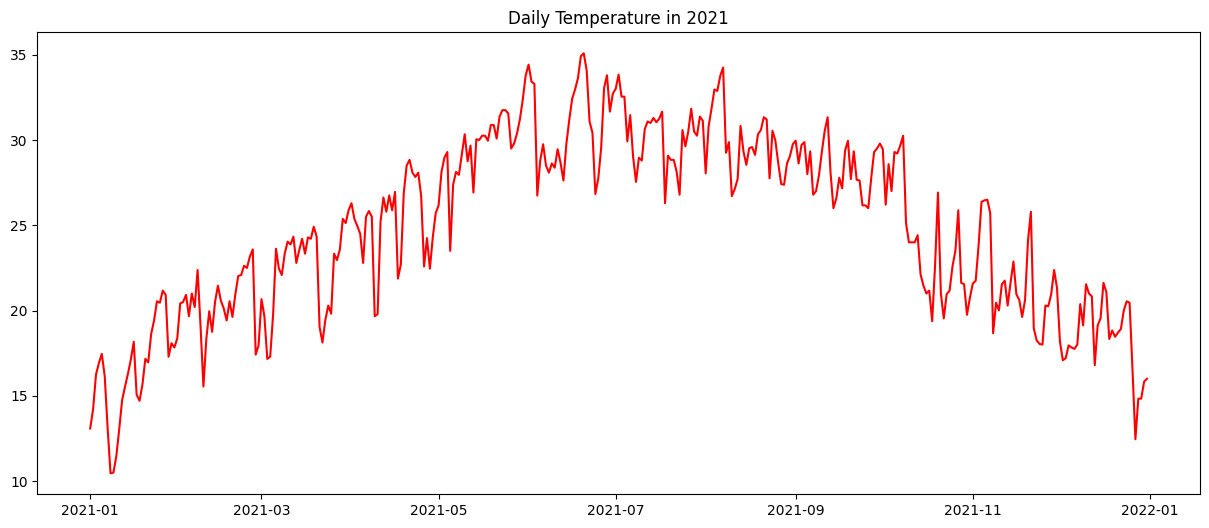

In [94]:
# Temperature daily pattern
temp = weather[weather['datetime'].between('2021-01-01', '2021-12-31')][['datetime', 'temperature']]
temp['date'] = temp['datetime'].dt.date
temp = temp.groupby('date')['temperature'].mean().reset_index()
temp.set_index('date', inplace=True)
#plot daily temperature in 2021
plt.figure(figsize=(15, 6))
plt.plot(temp['temperature'], color='red')
plt.title("Daily Temperature in 2021")

Text(0.5, 1.0, 'Daily Humidity in 2024')

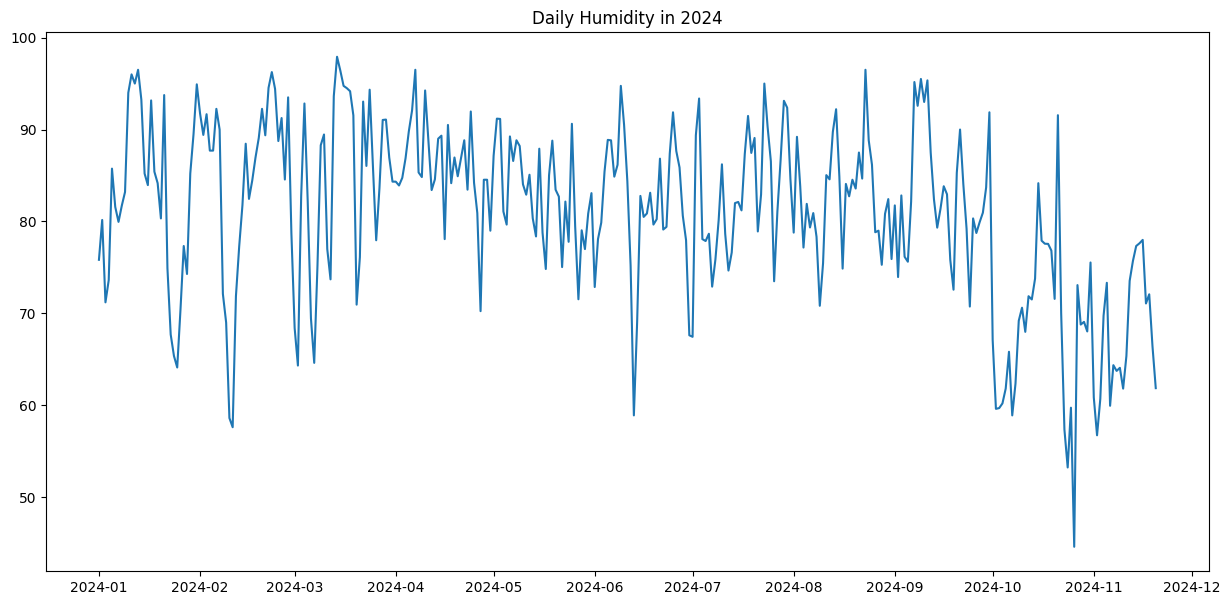

In [92]:
# Humidity daily pattern
humid = weather[weather['datetime'].between('2024-01-01', '2024-12-31')][['datetime', 'humidity']]
humid['date'] = humid['datetime'].dt.date
humid = humid.groupby('date')['humidity'].mean().reset_index()
humid.set_index('date', inplace=True)
#plot daily humidity in 2024
plt.figure(figsize=(15, 7))
plt.plot(humid['humidity'])
plt.title("Daily Humidity in 2024")

Text(0.5, 1.0, 'Correlation between temperature, humidity and wind speed')

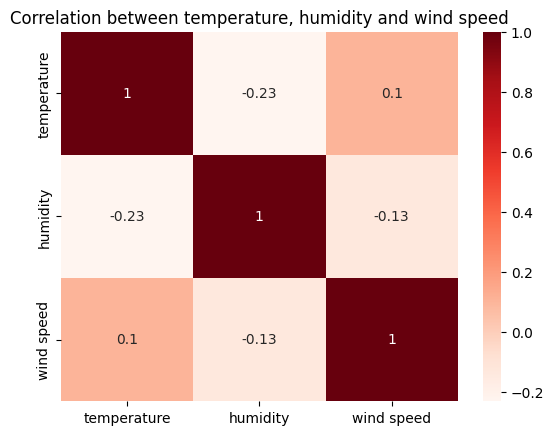

In [103]:
df = weather[['temperature', 'humidity', 'wind speed']]
cor = df.corr(numeric_only=True)
sns.heatmap(cor, annot=True, cmap='Reds')
plt.title('Correlation between temperature, humidity and wind speed')


In [133]:
#Number of days with high wind speed per month
df = weather.loc[:, ['datetime', 'wind speed']]
df['date'] = df['datetime'].dt.date
# df
df_daily = df.groupby('date')['wind speed'].max().reset_index()
df_daily['date'] = pd.to_datetime(df_daily['date'])
high_wind = df_daily[df_daily['wind speed'] > 30].groupby(df_daily['date'].dt.month)['wind speed'].count().reset_index()

# sns.barplot(high_wind['wind speed'], palette='viridis', hue=high_wind['date'])


ValueError: The following variable cannot be assigned with wide-form data: `hue`